In [514]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader.av.forex import AVForexReader


In [515]:
# panel_df_1.head(3)

In [516]:
n_test=10
n_lags=10
yahoo_other=["CL=F","RUB=X"]
yahoo_stocks=["^GSPC","^DJI","IMOEX.ME","000001.SS"]
from datetime import datetime
yahoo_ticks=yahoo_stocks+yahoo_other
# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = datetime.strptime('2015-01-01','%Y-%m-%d')
end_date = datetime.strptime('2020-12-31' ,'%Y-%m-%d')

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_df_1= data.DataReader(yahoo_ticks, 'yahoo', start_date, end_date).dropna()
# panel_df_2= data.DataReader("EFFR", 'fred', start_date, end_date).dropna()
# df_raw=pd.concat([panel_df_1, panel_df_2], axis=1, join='outer')
df_raw=panel_df_1


In [517]:
df_raw.tail(5)

Attributes    Adj Close                                                     \
Symbols           ^GSPC          ^DJI     IMOEX.ME    000001.SS       CL=F   
Date                                                                         
2020-03-12  2480.639893  21200.619141  2286.399902  2923.486084  32.980000   
2020-03-13  2711.020020  23185.619141  2316.379883  2887.427002  32.930000   
2020-03-16  2386.129883  20188.519531  2266.899902  2789.253906  31.730000   
2020-03-17  2529.189941  21237.380859  2224.739990  2779.641113  26.440001   
2020-03-18  2367.520020  19719.779297  2112.639893  2728.756348  25.219999   

Attributes                   Close                                          \
Symbols         RUB=X        ^GSPC          ^DJI     IMOEX.ME    000001.SS   
Date                                                                         
2020-03-12  73.114998  2480.639893  21200.619141  2286.399902  2923.486084   
2020-03-13  74.898102  2711.020020  23185.619141  2316.379883  2887.427002   
2020-03-16  73.237999  2386.129883  20188.519531  2266.899902  2789.253906   
2020-03-17  74.356300  2529.189941  21237.380859  2224.739990  2779.641113   
2020-03-18  80.674301  2367.520020  19719.779297  2112.639893  2728.756348   

Attributes  ...         Open                                           Volume  \
Symbols     ...     IMOEX.ME    000001.SS       CL=F      RUB=X         ^GSPC   
Date        ...                                                                 
2020-03-12  ...  2413.020020  2936.016113  33.070000  73.115097  8.829380e+09   
2020-03-13  ...  2277.659912  2804.231934  31.180000  74.879700  8.258670e+09   
2020-03-16  ...  2297.040039  2897.301025  33.750000  73.204697  7.781540e+09   
2020-03-17  ...  2263.620117  2796.283936  29.900000  74.356300  8.358500e+09   
2020-03-18  ...  2192.790039  2792.322021  27.049999  75.139000  2.258066e+09   

Attributes                                                         
Symbols            ^DJI IMOEX.ME     000001.SS         CL=F RUB=X  
Date                                                               
2020-03-12  908260000.0      0.0  3.078000e+05     963502.0   0.0  
2020-03-13  843080000.0      0.0  3.665000e+05  331620435.0   0.0  
2020-03-16  770130000.0      0.0  3.519000e+05     663525.0   0.0  
2020-03-17  793060000.0      0.0  3.061000e+05  227632002.0   0.0  
2020-03-18  382093734.0      0.0  3.346181e+09   18617533.0   0.0  

[5 rows x 36 columns]

In [518]:
df_joined=df_raw.copy()
df_joined.head(10)
# df_joined.xs('Close', level='Col', axis=0)
columns_to_select=[i  for i in df_joined.columns if i[0]=="Close" or i=="EFFR"]
df_joined=df_joined[columns_to_select]
df_joined.tail(3)
df_joined.columns=[i[1] if len(i)>1 else i for i in df_joined.columns]
df_joined=df_joined.dropna()
df_joined

,^GSPC,^DJI,IMOEX.ME,000001.SS,CL=F,RUB=X
Date,,,,,,
2015-01-16,2019.420044,17511.570312,1591.430054,3376.495117,48.689999,64.680000
2015-01-20,2022.550049,17515.230469,1570.969971,3173.052002,46.389999,64.806702
2015-01-21,2032.119995,17554.279297,1618.170044,3323.611084,47.779999,64.970001
2015-01-22,2063.149902,17813.980469,1666.560059,3343.343994,46.310001,65.269997
2015-01-23,2051.820068,17672.599609,1671.800049,3351.763916,45.590000,64.305000
...,...,...,...,...,...,...
2020-03-12,2480.639893,21200.619141,2286.399902,2923.486084,32.980000,73.114998
2020-03-13,2711.020020,23185.619141,2316.379883,2887.427002,32.930000,74.898102
2020-03-16,2386.129883,20188.519531,2266.899902,2789.253906,31.730000,73.237999


In [519]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [520]:
grangers_causation_matrix(df_joined, variables = df_joined.columns)     

c:\python_venvs\finance\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)
c:\python_venvs\finance\lib\site-packages\statsmodels\base\model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  'rank is %d' % (J, J_), ValueWarning)


,^GSPC_x,^DJI_x,IMOEX.ME_x,000001.SS_x,CL=F_x,RUB=X_x
^GSPC_y,1.0,0.0006,0.0000,0.1468,0.0000,0.1291
^DJI_y,0.0,1.0000,0.0000,0.1558,0.0000,0.2794
IMOEX.ME_y,0.0,0.0000,1.0000,0.1086,0.0480,0.0008
000001.SS_y,0.0,0.0000,0.0634,1.0000,0.0261,0.0000
CL=F_y,0.0,0.0000,0.0022,0.5370,1.0000,0.2543
RUB=X_y,0.0,0.0000,0.0000,0.0000,0.0000,1.0000


In [521]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df_joined)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
^GSPC  ::  61.19     > 83.9383   =>   False
^DJI   ::  38.36     > 60.0627   =>   False
IMOEX.ME ::  19.71     > 40.1749   =>   False
000001.SS ::  7.81      > 24.2761   =>   False
CL=F   ::  2.97      > 12.3212   =>   False
RUB=X  ::  0.34      > 4.1296    =>   False


In [522]:
df_joined.head(10)

,^GSPC,^DJI,IMOEX.ME,000001.SS,CL=F,RUB=X
Date,,,,,,
2015-01-16,2019.420044,17511.570312,1591.430054,3376.495117,48.689999,64.680000
2015-01-20,2022.550049,17515.230469,1570.969971,3173.052002,46.389999,64.806702
2015-01-21,2032.119995,17554.279297,1618.170044,3323.611084,47.779999,64.970001
2015-01-22,2063.149902,17813.980469,1666.560059,3343.343994,46.310001,65.269997
2015-01-23,2051.820068,17672.599609,1671.800049,3351.763916,45.590000,64.305000
2015-01-26,2057.090088,17678.699219,1642.369995,3383.181885,45.150002,64.010002
2015-01-27,2029.550049,17387.210938,1673.920044,3352.959961,46.230000,67.809998
2015-01-28,2002.160034,17191.369141,1647.709961,3305.738037,44.450001,67.955002
2015-01-29,2021.250000,17416.849609,1639.650024,3262.304932,44.529999,67.790001


In [523]:
nobs = 10
# for i in range(nobs):
#     df_joined.loc[len(df_joined)] = 0
# df_train, df_test = df_joined[0:-nobs], df_joined[-nobs:]
df_train=df_joined
# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)
df_test.tail(10)

(1024, 6)
(1024, 6)


,^GSPC,^DJI,IMOEX.ME,000001.SS,CL=F,RUB=X
Date,,,,,,
2020-03-04,3130.120117,27090.859375,2828.010010,3011.666016,47.180000,66.179604
2020-03-05,3023.939941,26121.279297,2816.699951,3071.677002,46.779999,66.192001
2020-03-06,2972.370117,25864.779297,2719.510010,3034.510986,45.900002,67.539398
2020-03-10,2882.229980,25018.160156,2498.939941,2996.761963,31.129999,74.640999
2020-03-11,2741.379883,23553.220703,2492.879883,2968.517090,34.360001,71.050201
2020-03-12,2480.639893,21200.619141,2286.399902,2923.486084,32.980000,73.114998
2020-03-13,2711.020020,23185.619141,2316.379883,2887.427002,32.930000,74.898102
2020-03-16,2386.129883,20188.519531,2266.899902,2789.253906,31.730000,73.237999
2020-03-17,2529.189941,21237.380859,2224.739990,2779.641113,26.440001,74.356300


In [524]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [525]:
# for name, column in df_train.iteritems():
#     adfuller_test(column, name=column.name)
#     print('\n')

In [526]:
df_differenced = df_train.diff().dropna()

In [527]:
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "^GSPC" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.278
 No. Lags Chosen       = 12
 Critical value 1%     = -3.437
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "^DJI" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.8818
 No. Lags Chosen       = 21
 Critical value 1%     = -3.437
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0022. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "IMOEX.ME" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level  

In [528]:
import statsmodels.tsa.vector_ar as st
# import statsmodels.tsa.vector_ar.dynamic.DynamicVAR as DVAR
model = VAR(df_differenced)

x = model.select_order(maxlags=12)
x.summary()

c:\python_venvs\finance\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


,AIC,BIC,FPE,HQIC
0,32.31,32.34,1.080e+14,32.32
1,31.94,32.14*,7.435e+13,32.02
2,31.80,32.18,6.461e+13,31.94*
3,31.75,32.31,6.167e+13,31.96
4,31.73,32.46,6.013e+13,32.00
5,31.70*,32.61,5.860e+13*,32.05
6,31.70,32.78,5.861e+13,32.11
7,31.71,32.96,5.901e+13,32.19
8,31.73,33.16,6.016e+13,32.27
9,31.75,33.36,6.151e+13,32.36


In [529]:
model_fitted = model.fit(6)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 18, Mar, 2020
Time:                     19:52:25
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    32.7826
Nobs:                     1017.00    HQIC:                   32.1158
Log likelihood:          -24559.7    FPE:                5.89545e+13
AIC:                      31.7076    Det(Omega_mle):     4.75773e+13
--------------------------------------------------------------------
Results for equation ^GSPC
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.187653         0.907633            0.207           0.836
L1.^GSPC            -0.207555         0.144351           -1.438           0.150
L1.^DJI              0.005316         0.015803            0.336 

In [530]:
def adjust(val, length= 6): return str(val).ljust(length)
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df_differenced.columns, out):
    print(adjust(col), ':', round(val, 2))

^GSPC  : 1.99
^DJI   : 2.0
IMOEX.ME : 1.98
000001.SS : 2.01
CL=F   : 2.0
RUB=X  : 2.01


### Forecast

In [531]:
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input
# df_differenced
# df_differenced

6


array([[-1.40850098e+02, -1.46493945e+03, -6.06005859e+00,
        -2.82448730e+01,  3.23000145e+00, -3.59079742e+00],
       [-2.60739990e+02, -2.35260156e+03, -2.06479980e+02,
        -4.50310059e+01, -1.38000107e+00,  2.06479645e+00],
       [ 2.30380127e+02,  1.98500000e+03,  2.99799805e+01,
        -3.60590820e+01, -4.99992371e-02,  1.78310394e+00],
       [-3.24890137e+02, -2.99709961e+03, -4.94799805e+01,
        -9.81730957e+01, -1.20000076e+00, -1.66010284e+00],
       [ 1.43060059e+02,  1.04886133e+03, -4.21599121e+01,
        -9.61279297e+00, -5.28999901e+00,  1.11830139e+00],
       [-1.61669922e+02, -1.51760156e+03, -1.12100098e+02,
        -5.08847656e+01, -1.22000122e+00,  6.31800079e+00]])

In [532]:
# df_differenced.values[:-lag_order,:]
df_differenced.values.shape

(1023, 6)

In [538]:
fc,lower,upper = model_fitted.forecast_interval(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_joined.index[-nobs:], columns=df_joined.columns + '_1d')
df_forecast_lower=pd.DataFrame(lower, index=df_joined.index[-nobs:], columns=df_joined.columns + '_1d')
df_forecast_upper=pd.DataFrame(upper, index=df_joined.index[-nobs:], columns=df_joined.columns + '_1d')

# fc

In [539]:
df_forecast.shape

(10, 6)

In [540]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [541]:
df_forecast

,^GSPC_1d,^DJI_1d,IMOEX.ME_1d,000001.SS_1d,CL=F_1d,RUB=X_1d
Date,,,,,,
2020-03-04,27.405054,319.579477,0.289298,-66.543527,0.865870,-3.458074
2020-03-05,-60.558205,-565.848703,-82.669017,6.965379,-3.998945,2.278299
2020-03-06,24.372551,205.629239,55.508373,-3.735898,3.209818,-0.956438
2020-03-10,-54.067036,-468.061727,-74.998951,-40.207626,-2.809589,1.158881
2020-03-11,37.412876,315.225437,29.017190,22.752997,0.879041,0.451293
2020-03-12,-51.495684,-443.595448,-37.476594,-17.244844,-1.192702,-0.018262
2020-03-13,30.669597,247.310549,3.006437,-5.818378,-0.237264,-0.076294
2020-03-16,-28.239244,-255.489089,-7.078317,0.427510,-0.011225,0.967267
2020-03-17,14.827578,136.214493,1.619159,1.780976,0.014387,-1.306282


In [542]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)        
df_results_lower = invert_transformation(df_train, df_forecast_lower, second_diff=False)        
df_results_upper = invert_transformation(df_train, df_forecast_upper, second_diff=False)        
# df_results.loc[:, ['rgnp_forecast', 'pgnp_forecast', 'ulc_forecast', 'gdfco_forecast',
#                    'gdf_forecast', 'gdfim_forecast', 'gdfcf_forecast', 'gdfce_forecast']]

In [543]:
df_results[[i for i in df_results.columns if "_forecast" in i]]
df_results[[i for i in df_results.columns if "_forecast" in i]]
df_results_lower[[i for i in df_results.columns if "_forecast" in i]]
# df_results_upper[[i for i in df_results.columns if "_forecast" in i]]

# [i for i in df_results.columns if "_forecast" in i]

,^GSPC_forecast,^DJI_forecast,IMOEX.ME_forecast,000001.SS_forecast,CL=F_forecast,RUB=X_forecast
Date,,,,,,
2020-03-04,2338.512739,19527.039567,2064.696283,2549.490528,23.401872,72.005756
2020-03-05,2220.641263,18441.448058,1932.760664,2441.138456,16.686579,67.742117
2020-03-06,2185.695213,18108.541876,1938.338952,2321.452400,17.169391,60.193159
2020-03-10,2071.882082,17098.796469,1813.335881,2163.384311,11.627899,54.724748
2020-03-11,2049.078777,16868.074358,1792.046554,2067.948599,9.759082,48.530701
2020-03-12,1937.210531,15877.045323,1703.272106,1931.423349,5.774780,41.851524
2020-03-13,1907.124176,15574.231349,1654.208433,1805.304718,2.717261,35.099470
2020-03-16,1818.053591,14767.979518,1595.034522,1685.337742,-0.116033,29.383850
2020-03-17,1771.836391,14351.534724,1544.432973,1566.508559,-2.925914,21.387380


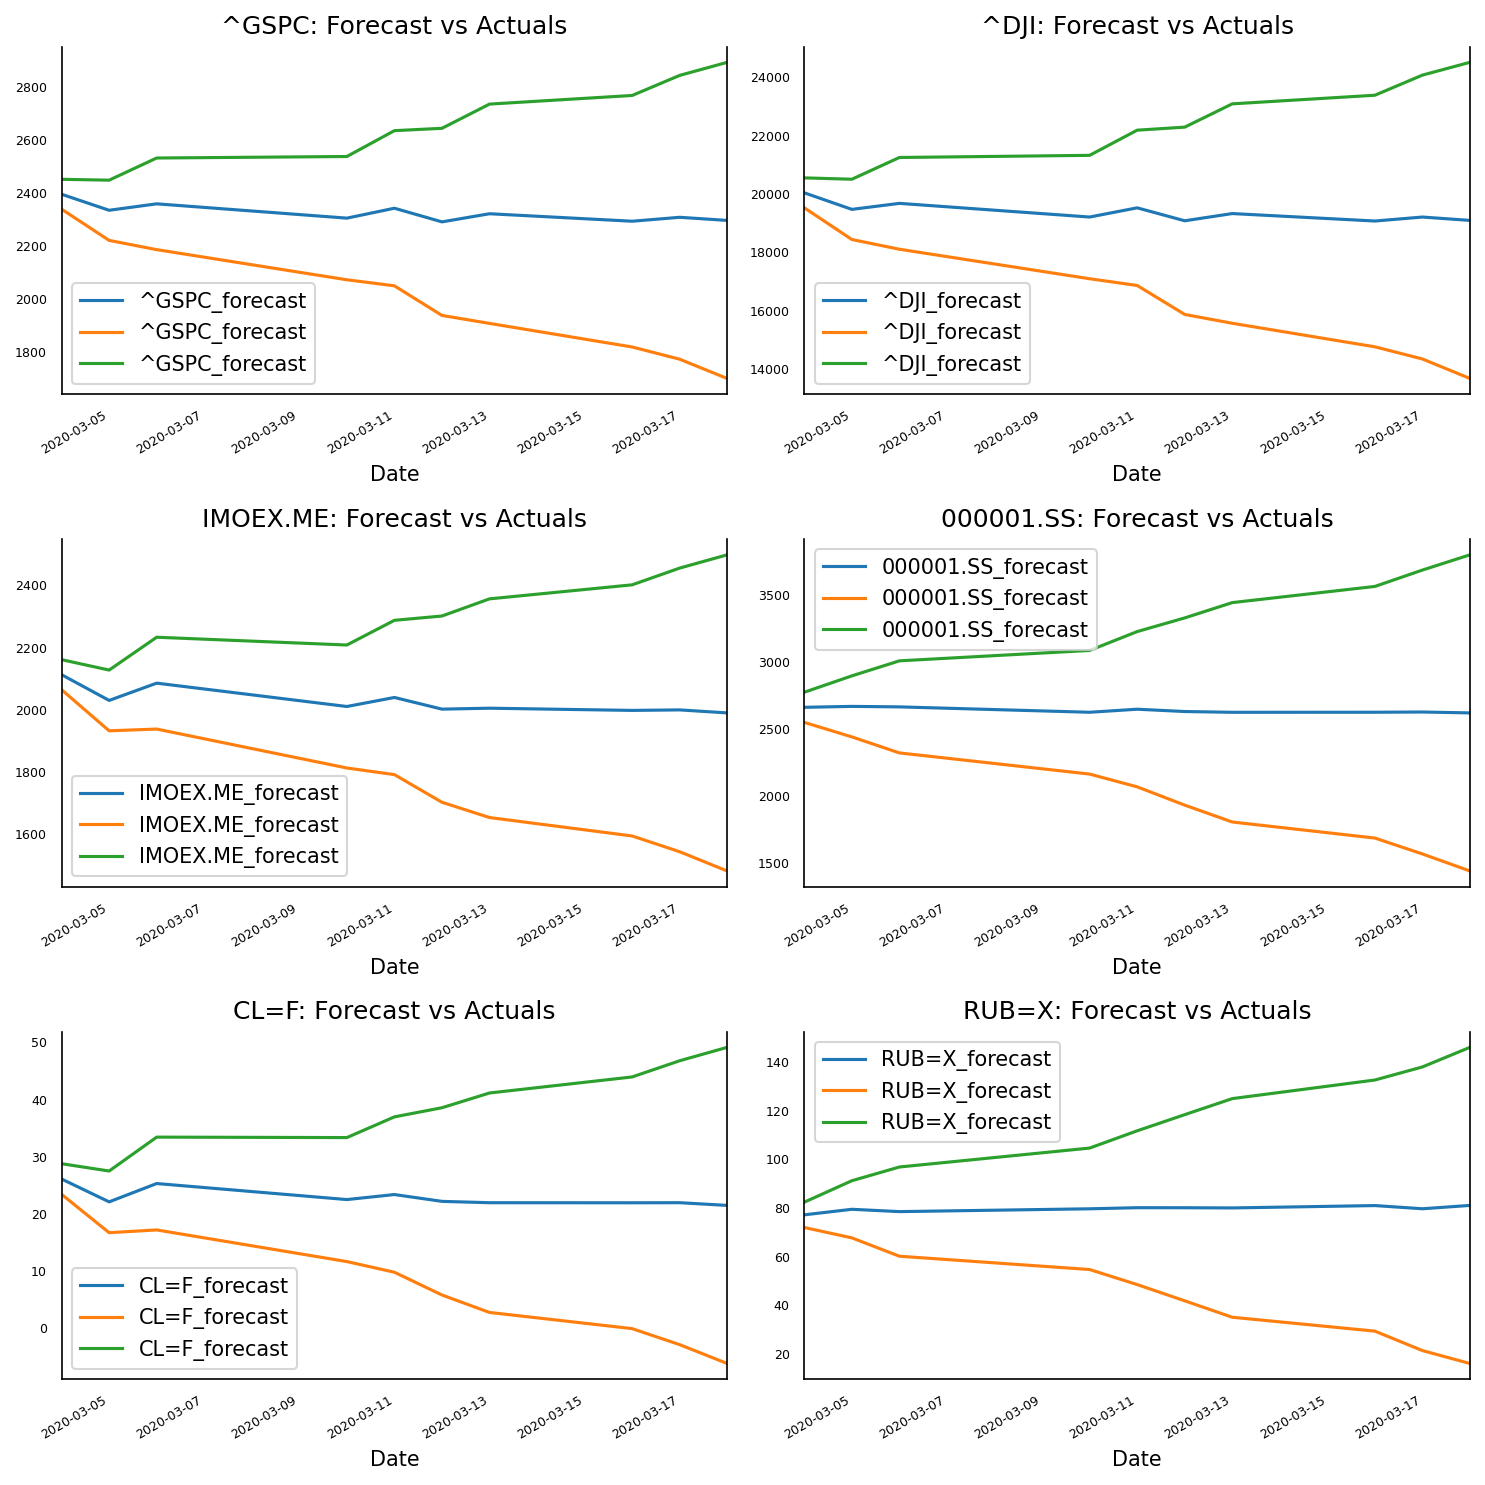

In [547]:

fig, axes = plt.subplots(nrows=int(len(df_train.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df_train.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_results_lower[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_results_upper[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)

#     df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();


In [453]:
# from statsmodels.tsa.stattools import acf
# def forecast_accuracy(forecast, actual):
#     mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
#     me = np.mean(forecast - actual)             # ME
#     mae = np.mean(np.abs(forecast - actual))    # MAE
#     mpe = np.mean((forecast - actual)/actual)   # MPE
#     rmse = np.mean((forecast - actual)**2)**.5  # RMSE
#     corr = np.corrcoef(forecast, actual)[0,1]   # corr
#     mins = np.amin(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     maxs = np.amax(np.hstack([forecast[:,None], 
#                               actual[:,None]]), axis=1)
#     minmax = 1 - np.mean(mins/maxs)             # minmax
#     return({'mape':mape, 'me':me, 'mae': mae, 
#             'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})













